<a href="https://colab.research.google.com/github/bhavyadora2002/VR_Project1_BhavyaDora_MT2024045/blob/main/VR_Task_a_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# a. Binary Classification Using Handcrafted Features and ML Classifiers

In [2]:
from google.colab import drive
import os
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import numpy as np

## Feature Extraction using Canny,Sobel,Contours

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train Distribution: {np.int64(0): np.int64(1732), np.int64(1): np.int64(1544)}
Test Distribution: {np.int64(0): np.int64(433), np.int64(1): np.int64(386)}


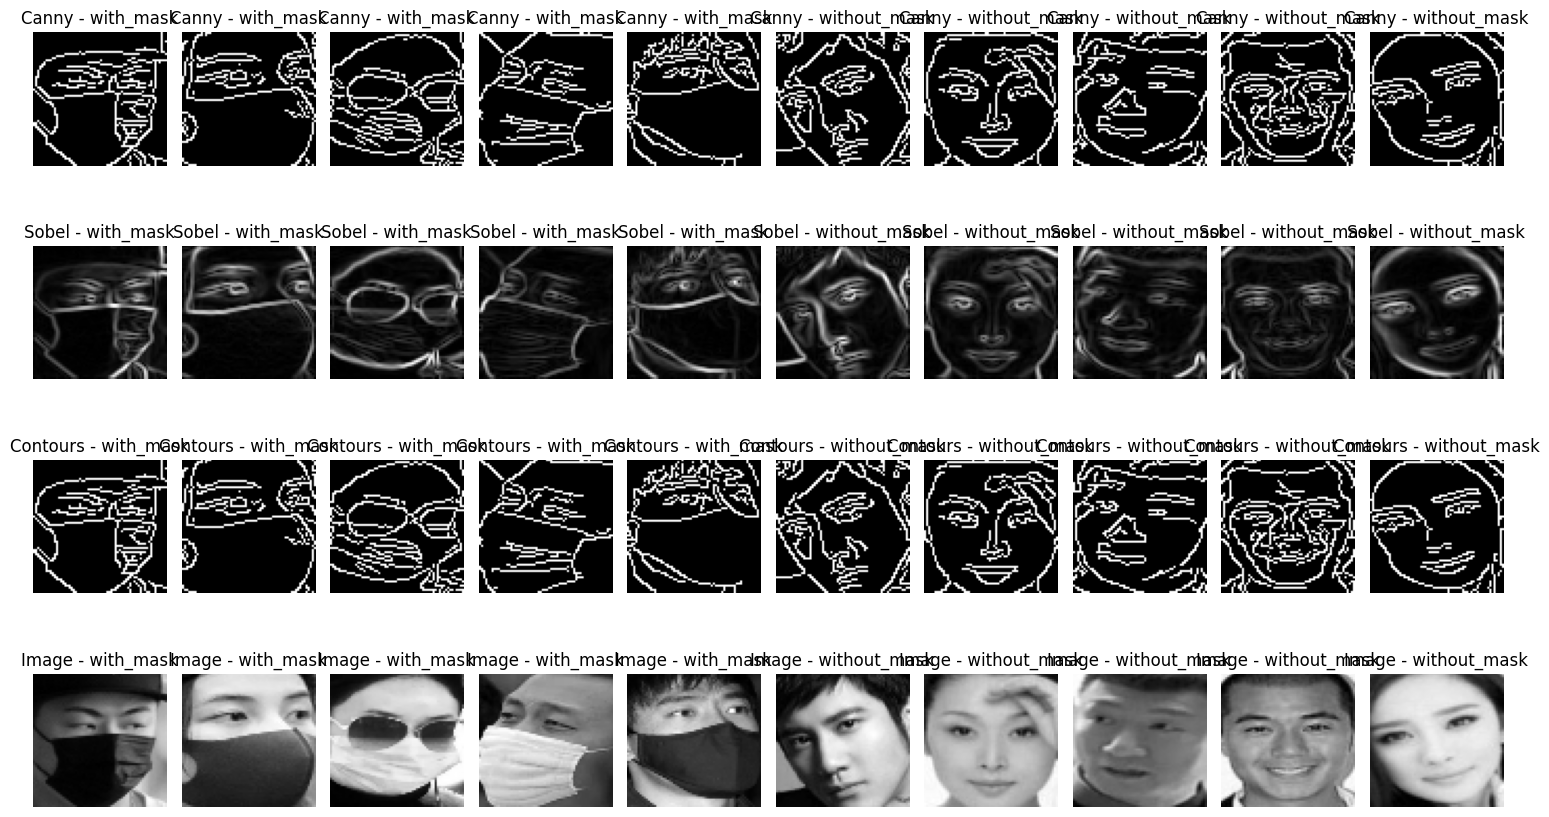

((3276, 4096), (819, 4096), (3276,), (819,))

In [19]:
drive.mount('/content/drive')
dataset_path = "/content/drive/MyDrive/Colab Notebooks/dataset"
categories = ["with_mask", "without_mask"]
data_canny = []
data_sobel = []
data_contours = []
labels = []
original_images = []
fig, axes = plt.subplots(4, 10, figsize=(15, 9))

idx_dict = {"with_mask": 0, "without_mask": 5}

for category in categories:
    folder_path = os.path.join(dataset_path, category)
    label = categories.index(category)

    idx = 0
    for img_name in os.listdir(folder_path):

        img_path = os.path.join(folder_path, img_name)

        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64, 64))
        original_images.append(img)

        # Canny Edge Detection
        canny_edges = cv2.Canny(img, threshold1=50, threshold2=150)

        #Sobel Edge Detection
        sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
        sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
        sobel_combined = cv2.magnitude(sobelx, sobely)

        # Contours Extraction
        contours, _ = cv2.findContours(canny_edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        contour_img = np.zeros_like(img)
        cv2.drawContours(contour_img, contours, -1, (255, 255, 255), 1)

        # Plot Canny, Sobel, Contours
        if idx < 5:
          col_idx = idx_dict[category]

          axes[0, col_idx].imshow(canny_edges, cmap='gray')
          axes[0, col_idx].set_title(f"Canny - {category}")
          axes[0, col_idx].axis('off')

          axes[1, col_idx].imshow(sobel_combined, cmap='gray')
          axes[1, col_idx].set_title(f"Sobel - {category}")
          axes[1, col_idx].axis('off')

          axes[2, col_idx].imshow(contour_img, cmap='gray')
          axes[2, col_idx].set_title(f"Contours - {category}")
          axes[2, col_idx].axis('off')

          axes[3, col_idx].imshow(img, cmap='gray')
          axes[3, col_idx].set_title(f"Image - {category}")
          axes[3, col_idx].axis('off')


          idx_dict[category] += 1
          idx += 1


        canny_features = canny_edges.flatten()
        sobel_features = sobel_combined.flatten()
        contour_features = contour_img.flatten()

        data_canny.append(canny_features)
        data_sobel.append(sobel_features)
        data_contours.append(contour_features)


        labels.append(label)

data_canny = np.array(data_canny)
data_sobel = np.array(data_sobel)
data_contours = np.array(data_contours)
labels = np.array(labels)
original_images = np.array(original_images)


splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, test_idx in splitter.split(data_canny, labels):
    X_train_canny, X_test_canny = data_canny[train_idx], data_canny[test_idx]
    y_train_canny, y_test_canny = labels[train_idx], labels[test_idx]
    X_train_sobel, X_test_sobel = data_sobel[train_idx], data_sobel[test_idx]
    y_train_sobel, y_test_sobel = labels[train_idx], labels[test_idx]
    X_train_contours, X_test_contours = data_contours[train_idx], data_contours[test_idx]
    y_train_contours, y_test_contours = labels[train_idx], labels[test_idx]


unique_train, counts_train = np.unique(y_train_canny, return_counts=True)
unique_test, counts_test = np.unique(y_test_canny, return_counts=True)

print(f"Train Distribution: {dict(zip(unique_train, counts_train))}")
print(f"Test Distribution: {dict(zip(unique_test, counts_test))}")


plt.tight_layout()
plt.show()

X_train_canny.shape, X_test_canny.shape, y_train_canny.shape, y_test_canny.shape
X_train_sobel.shape, X_test_sobel.shape, y_train_sobel.shape, y_test_sobel.shape
X_train_contours.shape, X_test_contours.shape, y_train_contours.shape, y_test_contours.shape


## Training with Random Forest and SVM

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_canny, y_train_canny)

y_pred_canny_rf = clf.predict(X_test_canny)

accuracy = accuracy_score(y_test_canny, y_pred_canny_rf)
print(f"Test Accuracy of RF on Canny: {accuracy:.2f}")

svm_clf = SVC(kernel='linear', C=1.0, random_state=42)
svm_clf.fit(X_train_canny, y_train_canny)

y_pred_canny_svm = svm_clf.predict(X_test_canny)

print(f"Test Accuracy of SVC on Canny: {accuracy_score(y_test_canny, y_pred_canny_svm):.2f}")



clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_sobel, y_train_sobel)

y_pred_sobel_rf = clf.predict(X_test_sobel)

accuracy = accuracy_score(y_test_sobel, y_pred_sobel_rf)
print(f"Test Accuracy of RF on Sobel: {accuracy:.2f}")

svm_clf = SVC(kernel='linear', C=1.0, random_state=42)
svm_clf.fit(X_train_sobel, y_train_sobel)

y_pred_sobel_svm = svm_clf.predict(X_test_sobel)

print(f"Test Accuracy of SVC on Sobel: {accuracy_score(y_test_sobel, y_pred_sobel_svm):.2f}")



clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_contours, y_train_contours)

y_pred_contours_rf = clf.predict(X_test_contours)

accuracy = accuracy_score(y_test_contours, y_pred_contours_rf)
print(f"Test Accuracy of RF on Contours: {accuracy:.2f}")

svm_clf = SVC(kernel='linear', C=1.0, random_state=42)
svm_clf.fit(X_train_contours, y_train_contours)

y_pred_contours_svm = svm_clf.predict(X_test_contours)

print(f"Test Accuracy of SVC on Contours: {accuracy_score(y_test_contours, y_pred_contours_svm):.2f}")


Test Accuracy of RF on Canny: 0.74
Test Accuracy of SVC on Canny: 0.76
Test Accuracy of RF on Sobel: 0.85
Test Accuracy of SVC on Sobel: 0.71
Test Accuracy of RF on Contours: 0.75
Test Accuracy of SVC on Contours: 0.76


Random Forest on Sobel gives good accuracy compared to others. Now we are displaying TP,TN,FP,FN for this

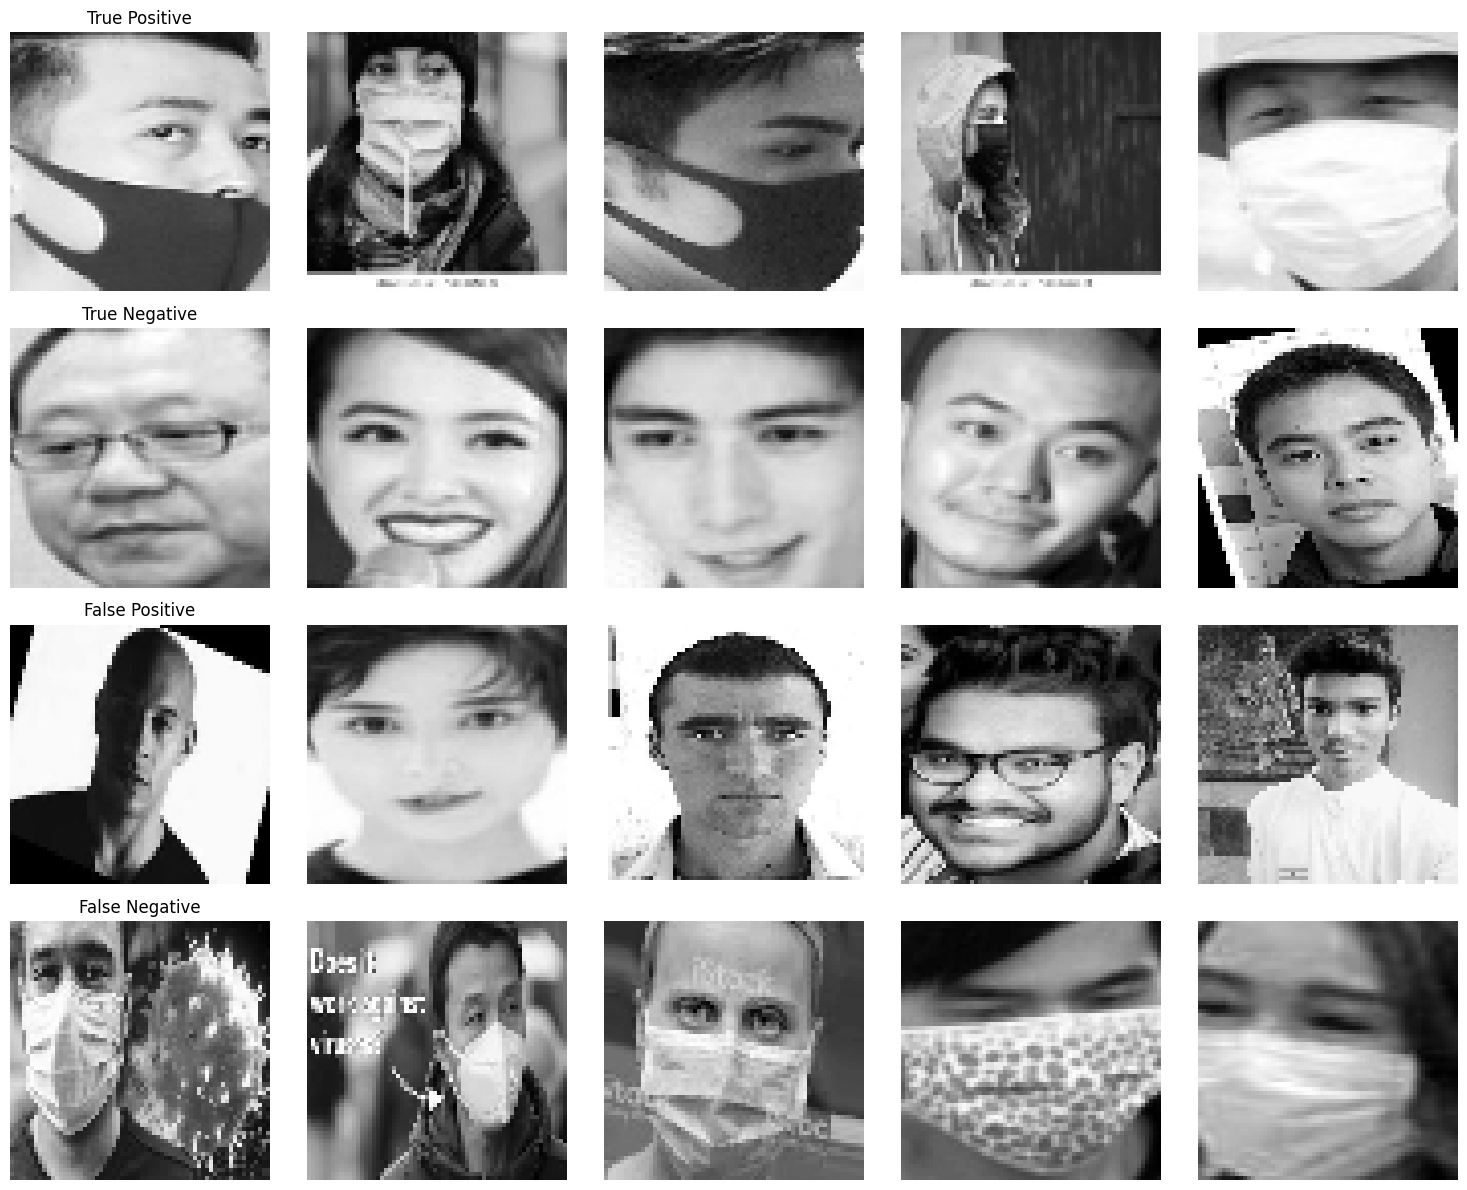

In [22]:
TP_indices = np.where((y_test_sobel == 0) & (y_pred_sobel_rf == 0))[0][:5]
TN_indices = np.where((y_test_sobel == 1) & (y_pred_sobel_rf == 1))[0][:5]
FP_indices = np.where((y_test_sobel == 1) & (y_pred_sobel_rf == 0))[0][:5]
FN_indices = np.where((y_test_sobel == 0) & (y_pred_sobel_rf == 1))[0][:5]

cases = [(TP_indices, "True Positive"), (TN_indices, "True Negative"),
         (FP_indices, "False Positive"), (FN_indices, "False Negative")]

fig, axes = plt.subplots(4, 5, figsize=(15, 12))

for row, (indices, label) in enumerate(cases):
    for col, idx in enumerate(indices):
        img = original_images[test_idx[idx]]
        axes[row, col].imshow(img, cmap='gray')
        axes[row, col].set_title(label if col == 0 else "")
        axes[row, col].axis('off')

plt.tight_layout()
plt.show()


# b. Binary Classification Using CNN

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [5]:
data=[]
labels= []
for category in categories:
    folder_path = os.path.join(dataset_path, category)
    label = categories.index(category)

    for img_name in os.listdir(folder_path):

        img_path = os.path.join(folder_path, img_name)

        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (64, 64))

        data.append(img)
        labels.append(label)

data = np.array(data)
labels = np.array(labels)


In [6]:
from sklearn.model_selection import StratifiedShuffleSplit
X = data / 255.0
y = labels

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, test_idx in splitter.split(X, y):
    X_train_val, X_test = X[train_idx], X[test_idx]
    y_train_val, y_test = y[train_idx], y[test_idx]

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, val_idx in splitter.split(X_train_val, y_train_val):
    X_train, X_val = X_train_val[train_idx], X_train_val[val_idx]
    y_train, y_val = y_train_val[train_idx], y_train_val[val_idx]

print(f"Training Data: {X_train.shape}, Labels: {y_train.shape}")
print(f"Validation Data: {X_val.shape}, Labels: {y_val.shape}")
print(f"Test Data: {X_test.shape}, Labels: {y_test.shape}")



Training Data: (2620, 64, 64, 3), Labels: (2620,)
Validation Data: (656, 64, 64, 3), Labels: (656,)
Test Data: (819, 64, 64, 3), Labels: (819,)


In [8]:

unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)
unique_val, counts_val = np.unique(y_val, return_counts=True)

print(f"Train Distribution: {dict(zip(unique_train, counts_train))}")
print(f"Test Distribution: {dict(zip(unique_test, counts_test))}")
print(f"Validation Distribution: {dict(zip(unique_val, counts_val))}")



Train Distribution: {np.int64(0): np.int64(1385), np.int64(1): np.int64(1235)}
Test Distribution: {np.int64(0): np.int64(433), np.int64(1): np.int64(386)}
Validation Distribution: {np.int64(0): np.int64(347), np.int64(1): np.int64(309)}


## Trying different Hyper-parameters

In [16]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad

optimizers = {
    "Adam": Adam(),
    "SGD": SGD(),
    "RMSprop": RMSprop(),
    "Adagrad": Adagrad()
}


results = {}

for opt_name, optimizer in optimizers.items():
    print(f"\nTraining with optimizer: {opt_name}\n")

    model = Sequential([
        Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(64, 64, 3)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),

        Conv2D(64, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),

        Conv2D(128, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),

        Flatten(),

        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=32, verbose=1)

    test_loss, test_acc = model.evaluate(X_test, y_test)
    results[opt_name] = test_acc
    print(f"{opt_name} Test Accuracy: {test_acc:.4f}")

best_optimizer = max(results, key=results.get)
print(f"\nBest Optimizer: {best_optimizer} with Accuracy: {results[best_optimizer]:.4f}")



Training with optimizer: Adam



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 45s 486ms/step - accuracy: 0.7973 - loss: 0.9245 - val_accuracy: 0.4710 - val_loss: 4.9207
Epoch 2/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 36s 424ms/step - accuracy: 0.9152 - loss: 0.2026 - val_accuracy: 0.4741 - val_loss: 3.7369
Epoch 3/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 34s 419ms/step - accuracy: 0.9300 - loss: 0.1845 - val_accuracy: 0.6220 - val_loss: 3.4509
Epoch 4/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 42s 433ms/step - accuracy: 0.9527 - loss: 0.1358 - val_accuracy: 0.7576 - val_loss: 1.2417
Epoch 5/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 44s 472ms/step - accuracy: 0.9729 - loss: 0.0670 - val_accuracy: 0.8735 - val_loss: 0.5646
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.8884 - loss: 0.4485
Adam Test Accuracy: 0.8950

Training with optimizer: SGD

Epoch 1/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 37s 440ms/step - accuracy: 0.7825 - loss: 0.5822 - val_accuracy: 0.4710 - val_loss: 1.0689
Epoch 2/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 36s 437ms/step - accuracy: 0.9138 - loss: 0.2083 - val_accuracy

 Adam and SGD shows better results compared to other classifiers.SGD is slightly better than Adam while comparing validation accuracy and test accuracy.

In [11]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad

results = {}
activation_functions = ["sigmoid", "softmax", "tanh", "relu"]
for activation in activation_functions:
    print(f"\nTraining with activation: {activation}\n")

    model = Sequential([
        Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(64, 64, 3)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),

        Conv2D(64, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),

        Conv2D(128, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),

        Flatten(),

        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation=activation)
    ])

    model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=32, verbose=1)

    test_loss, test_acc = model.evaluate(X_test, y_test)
    results[activation] = test_acc
    print(f"{activation} Test Accuracy: {test_acc:.4f}")

best_activation = max(results, key=results.get)
print(f"\nBest Activation: {best_activation} with Accuracy: {results[best_activation]:.4f}")



Training with activation: sigmoid

Epoch 1/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 36s 411ms/step - accuracy: 0.7790 - loss: 0.7340 - val_accuracy: 0.5381 - val_loss: 1.0792
Epoch 2/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 35s 422ms/step - accuracy: 0.8999 - loss: 0.2568 - val_accuracy: 0.8262 - val_loss: 0.4074
Epoch 3/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 41s 428ms/step - accuracy: 0.9208 - loss: 0.1964 - val_accuracy: 0.8186 - val_loss: 0.5108
Epoch 4/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 41s 425ms/step - accuracy: 0.9407 - loss: 0.1558 - val_accuracy: 0.8613 - val_loss: 0.3676
Epoch 5/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 40s 418ms/step - accuracy: 0.9375 - loss: 0.1600 - val_accuracy: 0.8796 - val_loss: 0.3359
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.9065 - loss: 0.2792
sigmoid Test Accuracy: 0.9048

Training with activation: softmax

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


82/82 ━━━━━━━━━━━━━━━━━━━━ 36s 411ms/step - accuracy: 0.4776 - loss: 0.9437 - val_accuracy: 0.4710 - val_loss: 1.1259
Epoch 2/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 40s 403ms/step - accuracy: 0.4623 - loss: 0.2737 - val_accuracy: 0.4710 - val_loss: 1.0419
Epoch 3/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 41s 403ms/step - accuracy: 0.4764 - loss: 0.1978 - val_accuracy: 0.4710 - val_loss: 0.3201
Epoch 4/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 41s 404ms/step - accuracy: 0.4718 - loss: 0.1707 - val_accuracy: 0.4710 - val_loss: 0.3525
Epoch 5/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 41s 403ms/step - accuracy: 0.4799 - loss: 0.1385 - val_accuracy: 0.4710 - val_loss: 0.2934
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 143ms/step - accuracy: 0.4945 - loss: 0.3065
softmax Test Accuracy: 0.4713

Training with activation: tanh

Epoch 1/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 37s 426ms/step - accuracy: 0.5447 - loss: 6.9721 - val_accuracy: 0.5290 - val_loss: 7.5922
Epoch 2/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 42s 439ms/step - accuracy: 0.5937 - loss: 6.4662 - val_accuracy: 0.

By observing results, Sigmoid works better than other activations.

In [23]:
results = {}
learning_rates = [0.001, 0.005, 0.01]
for lr in learning_rates:
    print(f"\nTraining with Learning rate: {lr}\n")

    model = Sequential([
        Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(64, 64, 3)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),

        Conv2D(64, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),

        Conv2D(128, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),

        Flatten(),

        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=SGD(learning_rate=lr,momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=32, verbose=1)

    test_loss, test_acc = model.evaluate(X_test, y_test)
    results[lr] = test_acc
    print(f"{lr} Test Accuracy: {test_acc:.4f}")


Training with Learning rate: 0.001



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 46s 541ms/step - accuracy: 0.7912 - loss: 0.5046 - val_accuracy: 0.4710 - val_loss: 1.3361
Epoch 2/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 40s 491ms/step - accuracy: 0.9216 - loss: 0.1846 - val_accuracy: 0.4710 - val_loss: 2.0400
Epoch 3/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 35s 421ms/step - accuracy: 0.9506 - loss: 0.1286 - val_accuracy: 0.5488 - val_loss: 1.3877
Epoch 4/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 36s 435ms/step - accuracy: 0.9683 - loss: 0.0825 - val_accuracy: 0.6860 - val_loss: 0.7845
Epoch 5/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 40s 490ms/step - accuracy: 0.9794 - loss: 0.0652 - val_accuracy: 0.8887 - val_loss: 0.2953
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.8962 - loss: 0.2414
0.001 Test Accuracy: 0.9011

Training with Learning rate: 0.005

Epoch 1/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 36s 413ms/step - accuracy: 0.7764 - loss: 0.6312 - val_accuracy: 0.7439 - val_loss: 0.5774
Epoch 2/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 40s 406ms/step - accuracy: 0.9062 - loss: 0.2334 - val_

The results are almost similar.We chose 0.01 for faster convergence

In [24]:
results = {}
batch_sizes = [16, 32, 64]
for bs in batch_sizes:
    print(f"\nTraining with Batch size: {bs}\n")

    model = Sequential([
        Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(64, 64, 3)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),

        Conv2D(64, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),

        Conv2D(128, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),

        Flatten(),

        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=SGD(learning_rate=0.01,momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=bs, verbose=1)

    test_loss, test_acc = model.evaluate(X_test, y_test)
    results[bs] = test_acc
    print(f"{bs} Test Accuracy: {test_acc:.4f}")

best_batch_size = max(results, key=results.get)
print(f"\nBest Batch Size: {best_batch_size} with Accuracy: {results[best_batch_size]:.4f}")


Training with Batch size: 16



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 47s 266ms/step - accuracy: 0.7162 - loss: 1.9579 - val_accuracy: 0.7851 - val_loss: 0.5260
Epoch 2/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 75s 222ms/step - accuracy: 0.8384 - loss: 0.4596 - val_accuracy: 0.8887 - val_loss: 0.3571
Epoch 3/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 41s 225ms/step - accuracy: 0.8657 - loss: 0.3503 - val_accuracy: 0.8765 - val_loss: 0.3176
Epoch 4/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 39s 213ms/step - accuracy: 0.8653 - loss: 0.3222 - val_accuracy: 0.8415 - val_loss: 0.4617
Epoch 5/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 41s 217ms/step - accuracy: 0.8658 - loss: 0.3018 - val_accuracy: 0.9101 - val_loss: 0.2331
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - accuracy: 0.9128 - loss: 0.2431
16 Test Accuracy: 0.9109

Training with Batch size: 32

Epoch 1/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 37s 420ms/step - accuracy: 0.7912 - loss: 0.5734 - val_accuracy: 0.6402 - val_loss: 0.7481
Epoch 2/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 43s 441ms/step - accuracy: 0.9010 - loss: 0.2547 - val

## CNN training with selected Hyper-Parameters

Training with batch size 32 gives better accuracy.

In [27]:
model = Sequential([
        Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(64, 64, 3)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),

        Conv2D(64, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),

        Conv2D(128, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),

        Flatten(),

        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

model.compile(optimizer=SGD(learning_rate=0.01,momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, verbose=1)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"{bs} Test Accuracy: {test_acc:.4f}")

Epoch 1/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 43s 456ms/step - accuracy: 0.7972 - loss: 0.6232 - val_accuracy: 0.5488 - val_loss: 1.7292
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 38s 415ms/step - accuracy: 0.9112 - loss: 0.2490 - val_accuracy: 0.8567 - val_loss: 0.4656
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 52s 552ms/step - accuracy: 0.9306 - loss: 0.1715 - val_accuracy: 0.6966 - val_loss: 1.7922
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 71s 422ms/step - accuracy: 0.9282 - loss: 0.1760 - val_accuracy: 0.8140 - val_loss: 0.8307
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 34s 412ms/step - accuracy: 0.9486 - loss: 0.1497 - val_accuracy: 0.8506 - val_loss: 0.4292
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 49s 509ms/step - accuracy: 0.9512 - loss: 0.1294 - val_accuracy: 0.9207 - val_loss: 0.3216
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 73s 403ms/step - accuracy: 0.9504 - loss: 0.1394 - val_accuracy: 0.9238 - val_loss: 0.2304
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 44s 435ms/step - accuracy: 0.9664 - loss: 0.0862 - val_accu

# Results Comparision

* Test Accuracy of RF on Canny: 0.74
* Test Accuracy of SVC on Canny: 0.76
* Test Accuracy of RF on Sobel: 0.85
* Test Accuracy of SVC on Sobel: 0.71
* Test Accuracy of RF on Contours: 0.75
* Test Accuracy of SVC on Contours: 0.76
* Test Accuracy of CNN: 0.9487

1.  CNN (0.9487 accuracy) is significantly better than RF (0.85) and SVM (0.76)
2.  CNN is better because
*   It will automatically learns features, while ML classifiers rely on manually extracted features.
*   ML classifiers rely on preprocessing, while CNN learns from raw pixel data













